# K-Means Clustering

# Importing the libraries

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


# Importing the dataset

In [126]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
# y = dataset.iloc[:, 3].values

In [140]:
col_list = ['urlDrugName', 'rating', 'effectiveness', 'sideEffects']
drugReview = pd.read_csv('drugReview.csv', usecols = col_list)
pd.set_option('display.max_columns',None)

In [149]:
drugReview2 = pd.read_csv('drugReview.csv')

In [151]:
drugReview

,urlDrugName,rating,effectiveness,sideEffects
0,166,4,1,1
1,319,1,1,4
2,345,10,1,3
3,353,3,3,1
4,259,2,3,4
...,...,...,...,...
3102,472,10,1,1
3103,493,1,2,0
3104,100,2,3,2
3105,445,8,0,1


In [142]:
le = LabelEncoder()

In [143]:
drugReview['urlDrugName'] = le.fit_transform(drugReview['urlDrugName'])
drugReview['sideEffects'] = le.fit_transform(drugReview['sideEffects'])
#drugReview['condition'] = le.fit_transform(drugReview['condition'])
drugReview['effectiveness'] = le.fit_transform(drugReview['effectiveness'])

In [144]:
X = drugReview.iloc[:, [2, 3]].values
y = drugReview.iloc[:, 2].values

In [132]:
y

array([1, 1, 1, ..., 3, 0, 4])

# Splitting the dataset into the Training set and Test set

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [134]:
print(X_train)
print(y_train)

[[0 2]
 [2 4]
 [1 3]
 ...
 [0 3]
 [0 1]
 [1 3]]
[0 2 1 ... 0 0 1]


In [135]:
X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Feature Scaling

In [136]:
'''from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
#X_train = X_train.shape[0]
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)'''

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\n#X_train = X_train.shape[0]\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

# Using the elbow method to find the optimal number of clusters

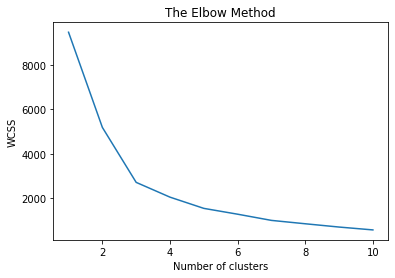

In [145]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset

In [146]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters

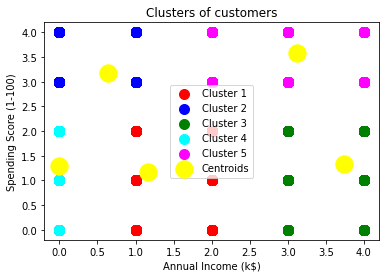

In [147]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()